## Part 1

In [151]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.datasets import imdb 
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [152]:
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2)

In [153]:
train_data[0]

[1,
 13,
 119,
 14,
 20,
 3836,
 2517,
 385,
 46,
 4,
 291,
 13,
 16,
 1447,
 5,
 12,
 47,
 69,
 61,
 483,
 237,
 13,
 70,
 377,
 1891,
 9,
 38,
 2706,
 11,
 14,
 20,
 13,
 435,
 8,
 6,
 318,
 800,
 7,
 3836,
 2517,
 236,
 314,
 5,
 12,
 16,
 40,
 6,
 3252,
 13,
 16,
 1264,
 8,
 67,
 49,
 283,
 451,
 1203,
 14,
 20,
 9,
 38,
 2,
 12,
 9,
 66,
 31,
 7,
 4,
 833,
 102,
 7,
 32,
 58,
 4,
 228,
 9,
 2,
 4,
 20,
 9,
 44,
 4,
 554,
 256,
 34,
 1891,
 27,
 223,
 9,
 5216,
 27,
 1143,
 9,
 4,
 2,
 511,
 11,
 513,
 5,
 29,
 47,
 27,
 523,
 23,
 4,
 2,
 35,
 5320,
 1950,
 50,
 9,
 57,
 888,
 138,
 3836,
 9,
 61,
 514,
 1399,
 13,
 70,
 1294,
 4,
 554,
 18,
 15,
 38,
 48,
 25,
 28,
 24,
 110,
 14,
 95,
 25,
 26,
 359,
 8,
 2,
 14,
 9,
 6,
 356,
 2]

In [154]:
train_labels[0:20]

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [155]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [156]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [157]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [158]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(10000,)))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [159]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 0.4480 - accuracy: 0.8464 - val_loss: 0.3244 - val_accuracy: 0.8981
Epoch 2/20
625/625 [==============================] - 1s 1ms/step - loss: 0.2937 - accuracy: 0.8984 - val_loss: 0.2572 - val_accuracy: 0.9144
Epoch 3/20
625/625 [==============================] - 1s 1ms/step - loss: 0.2463 - accuracy: 0.9148 - val_loss: 0.2248 - val_accuracy: 0.9237
Epoch 4/20
625/625 [==============================] - 1s 1ms/step - loss: 0.2200 - accuracy: 0.9236 - val_loss: 0.2051 - val_accuracy: 0.9309
Epoch 5/20
625/625 [==============================] - 1s 1ms/step - loss: 0.2029 - accuracy: 0.9302 - val_loss: 0.1927 - val_accuracy: 0.9347
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 0.1901 - accuracy: 0.9341 - val_loss: 0.1805 - val_accuracy: 0.9386
Epoch 7/20
625/625 [==============================] - 1s 1ms/step - loss: 0.1800 - accuracy: 0.9371 - val_loss: 0.1718 - val_accuracy: 0.9420
Epoch 

In [160]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 778us/step - loss: 0.3210 - accuracy: 0.8806


[0.32098719477653503, 0.8805599808692932]

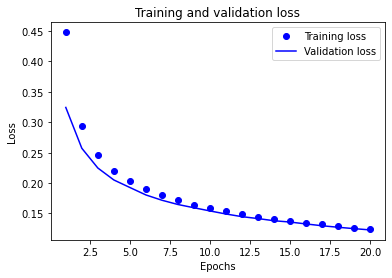

In [161]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [162]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [163]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3311 - accuracy: 0.8654 - val_loss: 0.1870 - val_accuracy: 0.9339
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.2032 - accuracy: 0.9213 - val_loss: 0.1507 - val_accuracy: 0.9479
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1691 - accuracy: 0.9374 - val_loss: 0.1317 - val_accuracy: 0.9528
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1489 - accuracy: 0.9460 - val_loss: 0.1201 - val_accuracy: 0.9593
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1346 - accuracy: 0.9505 - val_loss: 0.1094 - val_accuracy: 0.9623
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1223 - accuracy: 0.9564 - val_loss: 0.0961 - val_accuracy: 0.9683
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1130 - accuracy: 0.9606 - val_loss: 0.0892 - val_accuracy: 0.9709
Epoch 

In [164]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 853us/step - loss: 0.8107 - accuracy: 0.8512


[0.810722827911377, 0.8511599898338318]

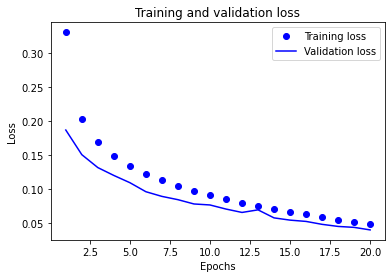

In [165]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [166]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [167]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.8655 - val_loss: 0.2113 - val_accuracy: 0.9209
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.2022 - accuracy: 0.9229 - val_loss: 0.1533 - val_accuracy: 0.9452
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1652 - accuracy: 0.9384 - val_loss: 0.1260 - val_accuracy: 0.9573
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1402 - accuracy: 0.9505 - val_loss: 0.1058 - val_accuracy: 0.9642
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9580 - val_loss: 0.0912 - val_accuracy: 0.9689
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9642 - val_loss: 0.0736 - val_accuracy: 0.9763
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0887 - accuracy: 0.9700 - val_loss: 0.0625 - val_accuracy: 0.9801
Epoch 

In [168]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 1.6504 - accuracy: 0.8496


[1.6504120826721191, 0.849560022354126]

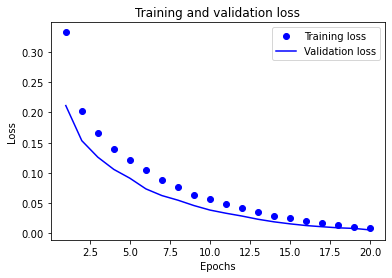

In [169]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [170]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [171]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 2s 3ms/step - loss: 0.3195 - accuracy: 0.8702 - val_loss: 0.1733 - val_accuracy: 0.9387
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.2012 - accuracy: 0.9238 - val_loss: 0.1428 - val_accuracy: 0.9495
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1661 - accuracy: 0.9385 - val_loss: 0.1225 - val_accuracy: 0.9586
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1414 - accuracy: 0.9481 - val_loss: 0.1041 - val_accuracy: 0.9637
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1231 - accuracy: 0.9572 - val_loss: 0.0962 - val_accuracy: 0.9683
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.9617 - val_loss: 0.0904 - val_accuracy: 0.9684
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 0.0978 - accuracy: 0.9677 - val_loss: 0.0796 - val_accuracy: 0.9756
Epoch 

In [172]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 1.2331 - accuracy: 0.8495


[1.233099341392517, 0.8494799733161926]

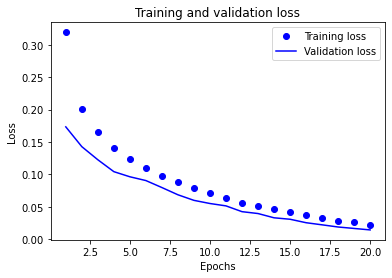

In [173]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [174]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [175]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 3s 5ms/step - loss: 0.3170 - accuracy: 0.8706 - val_loss: 0.1750 - val_accuracy: 0.9386
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1997 - accuracy: 0.9240 - val_loss: 0.1318 - val_accuracy: 0.9551
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1605 - accuracy: 0.9414 - val_loss: 0.1116 - val_accuracy: 0.9623
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1354 - accuracy: 0.9513 - val_loss: 0.0951 - val_accuracy: 0.9689
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1161 - accuracy: 0.9595 - val_loss: 0.0829 - val_accuracy: 0.9731
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1015 - accuracy: 0.9651 - val_loss: 0.0724 - val_accuracy: 0.9772
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0882 - accuracy: 0.9710 - val_loss: 0.0639 - val_accuracy: 0.9799
Epoch 

In [176]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 1.5529 - accuracy: 0.8524


[1.5529475212097168, 0.8523600101470947]

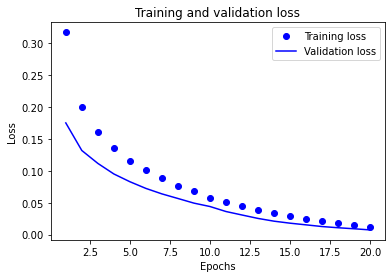

In [177]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [178]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [179]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 4s 7ms/step - loss: 0.3228 - accuracy: 0.8662 - val_loss: 0.1739 - val_accuracy: 0.9397
Epoch 2/20
625/625 [==============================] - 3s 6ms/step - loss: 0.1986 - accuracy: 0.9247 - val_loss: 0.1371 - val_accuracy: 0.9530
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1544 - accuracy: 0.9441 - val_loss: 0.1050 - val_accuracy: 0.9658
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1288 - accuracy: 0.9563 - val_loss: 0.0877 - val_accuracy: 0.9729
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1054 - accuracy: 0.9645 - val_loss: 0.0745 - val_accuracy: 0.9787
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0893 - accuracy: 0.9721 - val_loss: 0.0697 - val_accuracy: 0.9774
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 0.0715 - accuracy: 0.9784 - val_loss: 0.0548 - val_accuracy: 0.9843
Epoch 

In [180]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 2.3245 - accuracy: 0.8533


[2.3245089054107666, 0.8533200025558472]

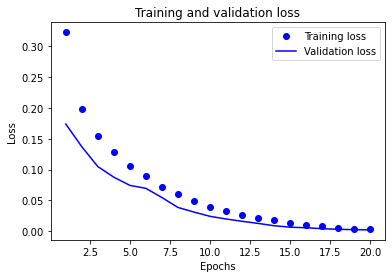

In [181]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [182]:
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

In [183]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0984 - accuracy: 0.8672 - val_loss: 0.0490 - val_accuracy: 0.9380
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0581 - accuracy: 0.9230 - val_loss: 0.0421 - val_accuracy: 0.9476
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0447 - accuracy: 0.9427 - val_loss: 0.0306 - val_accuracy: 0.9627
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 0.0353 - accuracy: 0.9564 - val_loss: 0.0221 - val_accuracy: 0.9743
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0276 - accuracy: 0.9664 - val_loss: 0.0191 - val_accuracy: 0.9780
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0223 - accuracy: 0.9736 - val_loss: 0.0153 - val_accuracy: 0.9827
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.0170 - accuracy: 0.9809 - val_loss: 0.0116 - val_accuracy: 0.9877
Epoch 

In [184]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.1276 - accuracy: 0.8608


[0.127583846449852, 0.860759973526001]

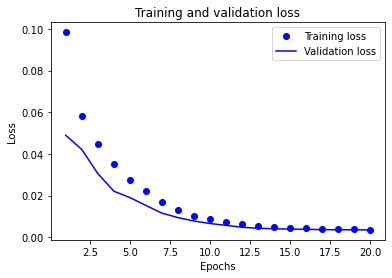

In [185]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [186]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [187]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3109 - accuracy: 0.8713 - val_loss: 0.1704 - val_accuracy: 0.9381
Epoch 2/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1985 - accuracy: 0.9241 - val_loss: 0.1445 - val_accuracy: 0.9494
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1655 - accuracy: 0.9376 - val_loss: 0.1216 - val_accuracy: 0.9590
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1449 - accuracy: 0.9459 - val_loss: 0.1095 - val_accuracy: 0.9640
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1315 - accuracy: 0.9521 - val_loss: 0.1012 - val_accuracy: 0.9668
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1207 - accuracy: 0.9564 - val_loss: 0.0969 - val_accuracy: 0.9682
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1126 - accuracy: 0.9601 - val_loss: 0.0939 - val_accuracy: 0.9688
Epoch 

In [188]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.5178 - accuracy: 0.8554


[0.5177631378173828, 0.8553599715232849]

In [189]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

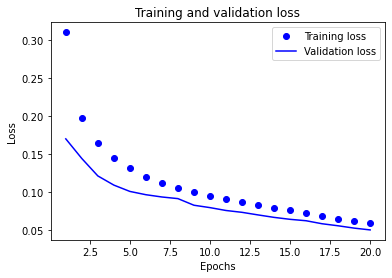

In [190]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 2

In [202]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [203]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

seed = 7
np.random.seed(seed)

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

<h4>Without regularization and dropout

In [217]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [218]:
history = network.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4960 - accuracy: 0.8232 - val_loss: 0.4328 - val_accuracy: 0.8462
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3808 - accuracy: 0.8644 - val_loss: 0.4126 - val_accuracy: 0.8597
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3542 - accuracy: 0.8774 - val_loss: 0.4363 - val_accuracy: 0.8555
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3399 - accuracy: 0.8836 - val_loss: 0.4242 - val_accuracy: 0.8654
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3300 - accuracy: 0.8889 - val_loss: 0.4164 - val_accuracy: 0.8708
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3210 - accuracy: 0.8928 - val_loss: 0.4351 - val_accuracy: 0.8717
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3137 - accuracy: 0.8964 - val_loss: 0.4819 - val_accuracy:

In [220]:
network.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.8831


[0.5709343552589417, 0.8830999732017517]

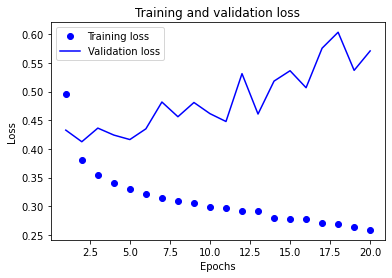

In [221]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h4>Regularization

In [206]:
from keras import models
from keras import layers
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [207]:
history = network.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7349 - accuracy: 0.7979 - val_loss: 0.5941 - val_accuracy: 0.8139
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5485 - accuracy: 0.8329 - val_loss: 0.5247 - val_accuracy: 0.8331
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5155 - accuracy: 0.8397 - val_loss: 0.4986 - val_accuracy: 0.8461
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4955 - accuracy: 0.8475 - val_loss: 0.7601 - val_accuracy: 0.7811
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4826 - accuracy: 0.8518 - val_loss: 0.5067 - val_accuracy: 0.8364
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4699 - accuracy: 0.8550 - val_loss: 0.5186 - val_accuracy: 0.8403
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4617 - accuracy: 0.8579 - val_loss: 0.6661 - val_accuracy:

In [209]:
network.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.8481


[0.5217410922050476, 0.8481000065803528]

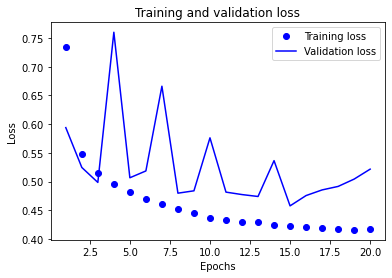

In [210]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h4>Dropout

In [213]:
from keras import models
from keras import layers
from keras import regularizers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [214]:
history = network.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5790 - accuracy: 0.7983 - val_loss: 0.4402 - val_accuracy: 0.8475
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4707 - accuracy: 0.8420 - val_loss: 0.4561 - val_accuracy: 0.8539
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4587 - accuracy: 0.8492 - val_loss: 0.4720 - val_accuracy: 0.8559
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4551 - accuracy: 0.8565 - val_loss: 0.4417 - val_accuracy: 0.8617
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4579 - accuracy: 0.8588 - val_loss: 0.4544 - val_accuracy: 0.8691
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4546 - accuracy: 0.8606 - val_loss: 0.4761 - val_accuracy: 0.8638
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4604 - accuracy: 0.8612 - val_loss: 0.4265 - val_accuracy:

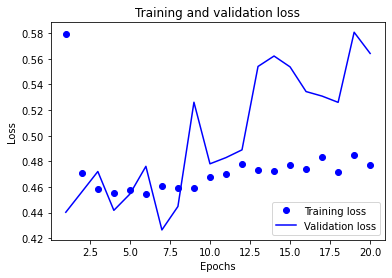

In [215]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [216]:
network.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.8778


[0.5641961693763733, 0.8777999877929688]

<h5>We see here that the plot without regularization and dropout clearly demonstrates overfitting. But after we regularize with l2 norm, the overfitting problem has been overcome.